In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# transaction = pd.read_json('transactions.txt',lines=True)

In [3]:
# transaction.to_csv('transaction.csv',sep='|',index=False)

In [4]:
import pandas as pd
import json
import numpy as np
from sklearn import metrics

import pandas
import random

# filename = 'transaction.csv'
# n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
# s = 10000 #desired sample size
# skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
# transaction = pandas.read_csv(filename,sep='|', skiprows=skip)

transaction = pd.read_csv('transaction.csv',sep='|')

In [5]:
transaction.dtypes

accountNumber                 int64
accountOpenDate              object
acqCountry                   object
availableMoney              float64
cardCVV                       int64
cardLast4Digits               int64
cardPresent                    bool
creditLimit                   int64
currentBalance              float64
currentExpDate               object
customerId                    int64
dateOfLastAddressChange      object
echoBuffer                  float64
enteredCVV                    int64
expirationDateKeyInMatch       bool
isFraud                        bool
merchantCategoryCode         object
merchantCity                float64
merchantCountryCode          object
merchantName                 object
merchantState               float64
merchantZip                 float64
posConditionCode            float64
posEntryMode                float64
posOnPremises               float64
recurringAuthInd            float64
transactionAmount           float64
transactionDateTime         

In [6]:
transaction.describe()

,accountNumber,availableMoney,cardCVV,cardLast4Digits,creditLimit,currentBalance,customerId,echoBuffer,enteredCVV,merchantCity,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount
count,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,6.419140e+05,0.0,641914.000000,0.0,0.0,0.0,641627.000000,638569.000000,0.0,0.0,641914.000000
mean,5.547701e+08,6652.828573,557.199927,4886.184043,10697.210608,4044.382035,5.547701e+08,NaN,556.775160,NaN,NaN,NaN,3.238367,9.136460,NaN,NaN,135.162497
std,2.546884e+08,9227.132275,257.326204,2859.053679,11460.359133,5945.510224,2.546884e+08,NaN,257.402639,NaN,NaN,NaN,9.680862,16.961185,NaN,NaN,147.053302
min,1.005471e+08,-1244.930000,100.000000,0.000000,250.000000,0.000000,1.005471e+08,NaN,1.000000,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,0.000000
25%,3.223192e+08,1114.970000,334.000000,2364.000000,5000.000000,502.442500,3.223192e+08,NaN,333.000000,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,32.320000
50%,5.438879e+08,3578.165000,581.000000,4873.000000,7500.000000,2151.860000,5.438879e+08,NaN,580.000000,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN,85.800000
75%,7.862277e+08,8169.185000,762.000000,7267.000000,15000.000000,5005.890000,7.862277e+08,NaN,761.000000,NaN,NaN,NaN,1.000000,9.000000,NaN,NaN,189.030000
max,9.999853e+08,50000.000000,998.000000,9998.000000,50000.000000,47496.500000,9.999853e+08,NaN,998.000000,NaN,NaN,NaN,99.000000,90.000000,NaN,NaN,1825.250000


In [7]:
transaction.isnull().sum()

accountNumber                    0
accountOpenDate                  0
acqCountry                    3913
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  641914
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                641914
merchantCountryCode            624
merchantName                     0
merchantState               641914
merchantZip                 641914
posConditionCode               287
posEntryMode                  3345
posOnPremises               641914
recurringAuthInd            641914
transactionAmount                0
transactionDateTime              0
transactionType     

In [9]:
len(transaction[transaction['isFraud'] == 1])

11302

In [10]:
transaction = transaction.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = transaction.loc[transaction['isFraud'] == 1]
non_fraud_df = transaction.loc[transaction['isFraud'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
transaction = normal_distributed_df.sample(frac=1, random_state=42)

transaction.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
14939,878527525,2014-03-30,US,2211.47,213,844,True,5000,2788.53,07/2028,...,Hardee's #186774,NaN,NaN,8.0,5.0,NaN,NaN,425.07,2016-03-31T16:49:11,PURCHASE
125367,215281922,2011-05-05,US,3771.42,966,6285,True,5000,1228.58,04/2025,...,Arbys #599566,NaN,NaN,8.0,9.0,NaN,NaN,180.97,2016-12-14T19:46:38,PURCHASE
406361,322666286,2015-06-24,US,10893.43,349,6423,False,15000,4106.57,05/2027,...,sears.com,NaN,NaN,1.0,5.0,NaN,NaN,70.54,2016-08-30T12:35:44,PURCHASE
67861,313627435,2015-08-29,US,7056.40,201,9511,True,7500,443.60,12/2018,...,Shell Gas #452340,NaN,NaN,1.0,5.0,NaN,NaN,29.55,2016-08-19T00:31:09,PURCHASE
617754,553875807,2014-04-05,US,239.47,528,4040,True,250,10.53,08/2027,...,Hardee's #584398,NaN,NaN,1.0,5.0,NaN,NaN,155.86,2016-12-06T23:14:09,PURCHASE


Distribution of the Classes in the subsample dataset
True     0.5
False    0.5
Name: isFraud, dtype: float64


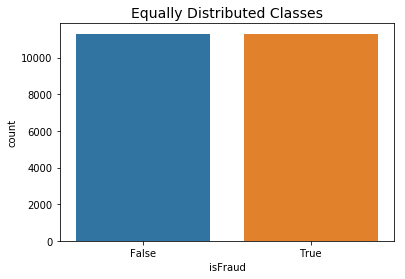

In [11]:
print('Distribution of the Classes in the subsample dataset')
print(transaction['isFraud'].value_counts()/len(transaction))

sns.countplot('isFraud', data=transaction)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [12]:
transaction.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'echoBuffer', 'enteredCVV',
       'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode',
       'merchantCity', 'merchantCountryCode', 'merchantName', 'merchantState',
       'merchantZip', 'posConditionCode', 'posEntryMode', 'posOnPremises',
       'recurringAuthInd', 'transactionAmount', 'transactionDateTime',
       'transactionType'],
      dtype='object')

In [13]:
binary_col = ['isFraud','cardPresent','expirationDateKeyInMatch']
for col in binary_col:
    transaction[col] = transaction[col].apply(lambda x: 1 if x == True else 0)

In [14]:
column_dropped = ['customerId','accountNumber','echoBuffer',
                  'accountNumber','merchantCity','merchantState','posOnPremises','recurringAuthInd']
# char_column = ['acqCountry','posConditionCode','posEntryMode','transactionType',
#                'merchantZip','merchantName','merchantCategoryCode','merchantCountryCode']
char_column = ['acqCountry','posConditionCode','posEntryMode','transactionType',
               'merchantZip','merchantCategoryCode','merchantCountryCode']
imputed_column = ['acqCountry','merchantCountryCode','posConditionCode','posEntryMode','transactionType']
transaction = transaction.drop(columns=column_dropped)
transaction[char_column] = transaction[char_column].astype(str)

In [15]:
char_column = ['acqCountry','posConditionCode','posEntryMode','transactionType',
               'merchantZip','merchantName','merchantCategoryCode','merchantCountryCode']
for i in char_column:
    print('{} : {}'.format(i,transaction[i].nunique()))

acqCountry : 5
posConditionCode : 4
posEntryMode : 6
transactionType : 4
merchantZip : 1
merchantName : 2108
merchantCategoryCode : 19
merchantCountryCode : 5


In [16]:
from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(transaction[imputed_column])
transaction[imputed_column] = imp_mode.transform(transaction[imputed_column])

In [17]:
transaction.isnull().sum()

accountOpenDate             0
acqCountry                  0
availableMoney              0
cardCVV                     0
cardLast4Digits             0
cardPresent                 0
creditLimit                 0
currentBalance              0
currentExpDate              0
dateOfLastAddressChange     0
enteredCVV                  0
expirationDateKeyInMatch    0
isFraud                     0
merchantCategoryCode        0
merchantCountryCode         0
merchantName                0
merchantZip                 0
posConditionCode            0
posEntryMode                0
transactionAmount           0
transactionDateTime         0
transactionType             0
dtype: int64

In [18]:
transaction['acqCountry'].value_counts()

US     22166
nan      199
MEX      104
CAN       80
PR        55
Name: acqCountry, dtype: int64

In [19]:
#Change account open date to days since register
transaction['daysSinceRegister'] = transaction['accountOpenDate'].\
apply(lambda x: pd.to_datetime('today') - pd.to_datetime(x)).apply(lambda x: x.days)

##Change account open date to days since register
transaction['daysToExpiration'] = transaction['currentExpDate'].\
apply(lambda x: pd.to_datetime('today') - pd.to_datetime(x)).apply(lambda x: x.days)

##Change account open date to days since register
transaction['daySinceLastAddressChange'] = transaction['dateOfLastAddressChange'].\
apply(lambda x: pd.to_datetime('today') - pd.to_datetime(x)).apply(lambda x: x.days)

In [20]:
transaction = transaction.drop(columns=['accountOpenDate'])
transaction = transaction.drop(columns=['currentExpDate'])
transaction = transaction.drop(columns=['dateOfLastAddressChange'])

In [21]:
transaction['trx_hour'] = transaction['transactionDateTime'].apply(lambda x: pd.to_datetime(x).hour)
transaction['trx_day_of_week'] = transaction['transactionDateTime'].apply(lambda x: pd.to_datetime(x).dayofweek)
transaction['trx_day'] = transaction['transactionDateTime'].apply(lambda x: pd.to_datetime(x).day)
transaction['trx_month'] = transaction['transactionDateTime'].apply(lambda x: pd.to_datetime(x).month)

In [22]:
transaction = transaction.drop(columns=['transactionDateTime'])

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto').fit(transaction[char_column])
transformed_data = encoder.transform(transaction[char_column]).toarray()
transformed_data = pd.DataFrame(transformed_data,columns=encoder.get_feature_names(char_column))
transaction = transaction.reset_index()
transaction = pd.concat([transaction, transformed_data], axis=1)
transaction = transaction.drop(columns=char_column)

In [24]:
y = transaction['isFraud']
transaction = transaction.drop(columns=['isFraud'])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transaction, y, test_size=0.2, random_state=42)

In [26]:
transaction.head()

,index,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,enteredCVV,expirationDateKeyInMatch,transactionAmount,...,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,merchantCountryCode_nan
0,14939,2211.47,213,844,1,5000,2788.53,213,0,425.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,125367,3771.42,966,6285,1,5000,1228.58,966,0,180.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,406361,10893.43,349,6423,0,15000,4106.57,349,0,70.54,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67861,7056.40,201,9511,1,7500,443.60,201,0,29.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,617754,239.47,528,4040,1,250,10.53,528,0,155.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
# model = SVC()

model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

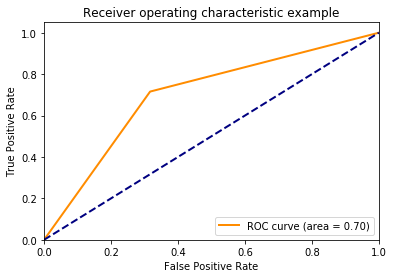

In [30]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()